In [0]:
#!unzip aclImdb.zip


In [0]:
path = 'aclImdb/train/'


In [0]:
labels = []
texts = []

In [0]:
import os

In [0]:
train_dir = os.path.join('aclImdb/','train')

In [0]:
for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir,label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:]=='.txt':
      f = open(os.path.join(dir_name,fname))
      texts.append(f.read())
      f.close()
    if label_type=='neg':
      labels.append(0)
    else:
      labels.append(1)

In [0]:
#labels

In [0]:
# Tokenizing the data

In [0]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
import numpy as np

In [12]:
len(texts)

25000

In [0]:
maxlen = 200
training_samples = 10000
validation_samples = 5000
max_words = 10000

In [0]:
tokenizer  = Tokenizer( num_words = max_words)
tokenizer.fit_on_texts(texts)

In [0]:
sequences = tokenizer.texts_to_sequences(texts)

In [0]:
word_index = tokenizer.word_index

In [18]:
len(word_index)

88582

In [19]:
type(word_index)

dict

In [0]:
data = pad_sequences(sequences,maxlen=maxlen)

In [21]:
data.shape

(25000, 200)

In [0]:
labels = np.asarray(labels)

In [23]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
labels.shape

(25000,)

In [0]:
indices = np.arange(data.shape[0])

In [26]:
indices

array([    0,     1,     2, ..., 24997, 24998, 24999])

In [0]:
np.random.shuffle(indices)

In [0]:
data = data[indices]

In [0]:
labels = labels[indices]

In [30]:
labels

array([0, 1, 0, ..., 1, 1, 1])

In [0]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [0]:
from keras.layers import Embedding,Flatten,Dense
from keras.models import Sequential

In [33]:
embeddimg_dim = 100
model = Sequential()
model.add(Embedding(max_words,embeddimg_dim,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Nadam

In [0]:
model.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
labels

array([0, 1, 0, ..., 1, 1, 1])

In [38]:
history  = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_val,y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 6s 584us/step - loss: 0.4617 - accuracy: 0.7589 - val_loss: 0.3562 - val_accuracy: 0.8444
Epoch 2/20
10000/10000 [==============================] - 6s 556us/step - loss: 0.0665 - accuracy: 0.9774 - val_loss: 0.6929 - val_accuracy: 0.7626
Epoch 3/20
10000/10000 [==============================] - 5s 548us/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.4634 - val_accuracy: 0.8414
Epoch 4/20
10000/10000 [==============================] - 5s 534us/step - loss: 6.6085e-04 - accuracy: 1.0000 - val_loss: 0.4816 - val_accuracy: 0.8432
Epoch 5/20
10000/10000 [==============================] - 5s 529us/step - loss: 3.6891e-04 - accuracy: 1.0000 - val_loss: 0.4963 - val_accuracy: 0.8442
Epoch 6/20
10000/10000 [==============================] - 5s 535us/step - loss: 2.4437e-04 - accuracy: 1.0000 - val_loss: 0.5085 - val_accuracy: 0.8442
Epoch 7/20
10000/10000 [===========================

In [0]:
model.save_weights('not_pretrained_embedding.h5')

In [0]:
import matplotlib.pyplot as plt

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [0]:
epochs = range(1,len(acc)+1)

<Figure size 432x288 with 0 Axes>

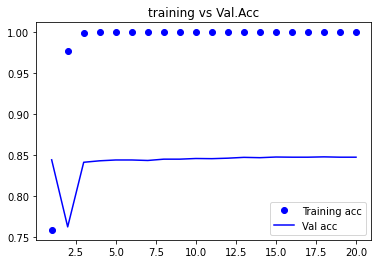

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Val acc')
plt.title('training vs Val.Acc')
plt.legend()
plt.figure()


<Figure size 432x288 with 0 Axes>

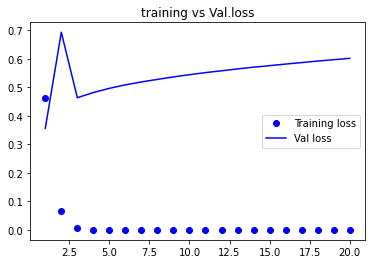

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Val loss')
plt.title('training vs Val.loss')
plt.legend()
plt.figure()


In [0]:
# Need an embedding Matrix if working with pretrained embeddings
#embedding_dim = 100
#embedding_matrix = np.zeros((max_words, embedding_dim))
#for word, i in word_index.items():
  #if i < max_words:
    #embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
embedding_matrix[i] = embedding_vector